<a href="https://colab.research.google.com/github/21f21885/muffins-vs-chic/blob/main/Copy_of_muffin_vs_chihuahua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
# Paths to your dataset — adjust folder names as needed
train_dir = '/content/drive/MyDrive/muffin vs chihuahua/train'
test_dir = '/content/drive/MyDrive/muffin vs chihuahua/test'

In [ ]:
import os

print("Training muffins:", len(os.listdir(train_dir + '/muffin')))
print("Training chihuahuas:", len(os.listdir(train_dir + '/chihuahua')))
print("Testing muffins:", len(os.listdir(test_dir + '/muffin')))
print("Testing chihuahuas:", len(os.listdir(test_dir + '/chihuahua')))

Training muffins: 2184
Training chihuahuas: 2559
Testing muffins: 554
Testing chihuahuas: 646


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 3796 images belonging to 2 classes.
Found 947 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))  # Binary output

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 1191s 10s/step - accuracy: 0.7297 - loss: 2.6529 - val_accuracy: 0.5396 - val_loss: 13.4605
Epoch 2/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 1022s 9s/step - accuracy: 0.7941 - loss: 0.9028 - val_accuracy: 0.5396 - val_loss: 9.0706
Epoch 3/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 1057s 9s/step - accuracy: 0.8180 - loss: 0.7054 - val_accuracy: 0.5945 - val_loss: 1.7205
Epoch 4/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 1026s 9s/step - accuracy: 0.8343 - loss: 0.5334 - val_accuracy: 0.7983 - val_loss: 0.4922
Epoch 5/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 1033s 9s/step - accuracy: 0.8784 - loss: 0.3419 - val_accuracy: 0.7782 - val_loss: 0.4902
Epoch 6/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 1020s 9s/step - accuracy: 0.9020 - loss: 0.2792 - val_accuracy: 0.8606 - val_loss: 0.4645
Epoch 7/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 1045s 9s/step - accuracy: 0.9128 - loss: 0.2423 - val_accuracy: 0.8712 - val_loss: 0.3653
Epoch 8/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 1012s 8s/step - accuracy: 0.9197 - loss: 0.2244 

In [ ]:
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 1200 images belonging to 2 classes.


In [ ]:
predictions = model.predict(test_data)

38/38 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

predictions = model.predict(test_data)
predicted_labels = (predictions > 0.5).astype(int)
true_labels = test_data.classes

print("Confusion Matrix:")
print(confusion_matrix(true_labels, predicted_labels))

print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels, target_names=['chihuahua', 'muffin']))

38/38 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step
Confusion Matrix:
[[230 416]
 [201 353]]

Classification Report:
              precision    recall  f1-score   support

   chihuahua       0.53      0.36      0.43       646
      muffin       0.46      0.64      0.53       554

    accuracy                           0.49      1200
   macro avg       0.50      0.50      0.48      1200
weighted avg       0.50      0.49      0.48      1200



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 1472s 12s/step - accuracy: 0.6808 - loss: 4.6223 - val_accuracy: 0.5396 - val_loss: 13.0402
Epoch 2/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 972s 8s/step - accuracy: 0.7803 - loss: 1.6062 - val_accuracy: 0.5396 - val_loss: 17.8463
Epoch 3/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 933s 8s/step - accuracy: 0.8228 - loss: 0.8293 - val_accuracy: 0.5407 - val_loss: 4.4418
Epoch 4/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 922s 8s/step - accuracy: 0.8371 - loss: 0.5842 - val_accuracy: 0.6536 - val_loss: 2.3367
Epoch 5/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 1002s 8s/step - accuracy: 0.8606 - loss: 0.4858 - val_accuracy: 0.8374 - val_loss: 0.4522
Epoch 6/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 981s 8s/step - accuracy: 0.8727 - loss: 0.3670 - val_accuracy: 0.8405 - val_loss: 0.4437
Epoch 7/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 977s 8s/step - accuracy: 0.9026 - loss: 0.2686 - val_accuracy: 0.8353 - val_loss: 0.4161
Epoch 8/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 970s 8s/step - accuracy: 0.9335 - loss: 0.1847 - val

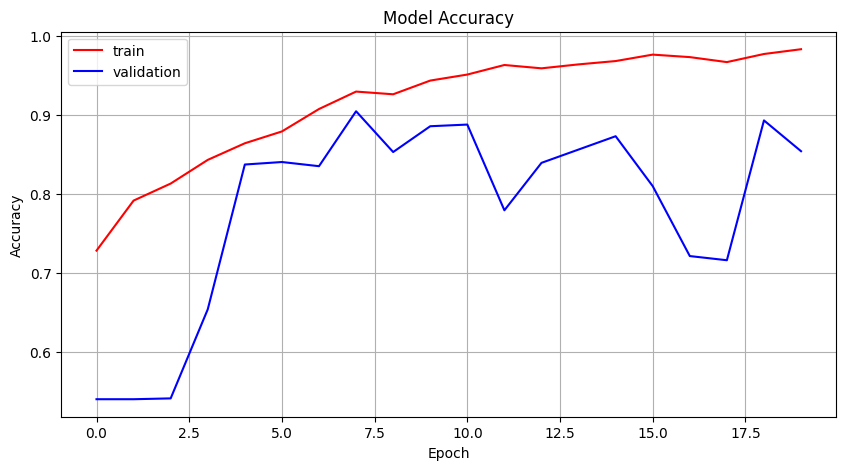

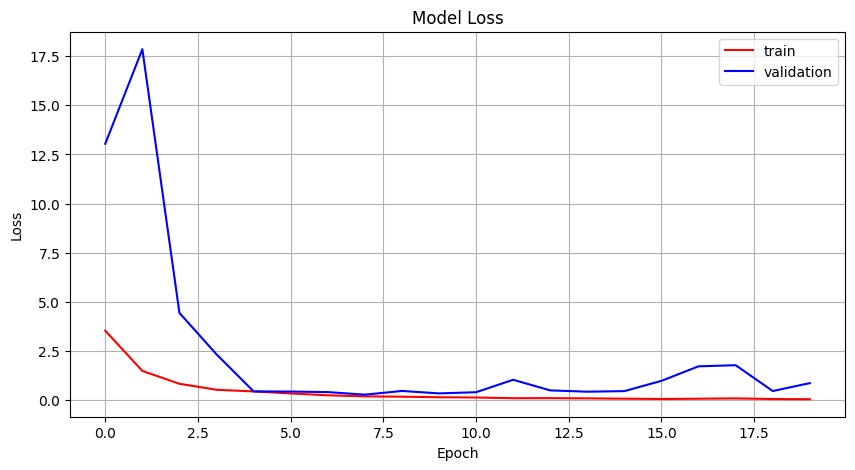

In [ ]:
# This cell assumes that 'model', 'train_data', and 'validation_data'
# have been defined in previous cells.

# Train the model and store the training history in the 'history' variable
history = model.fit(train_data, epochs=20, validation_data=validation_data)

# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(10, 5)) # Optional: set figure size
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.title('Model Accuracy') # Optional: add title
plt.xlabel('Epoch')        # Optional: add xlabel
plt.ylabel('Accuracy')     # Optional: add ylabel
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 5)) # Optional: set figure size
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.title('Model Loss')    # Optional: add title
plt.xlabel('Epoch')        # Optional: add xlabel
plt.ylabel('Loss')         # Optional: add ylabel
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[230 416]
 [201 353]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.53      0.36      0.43       646
           1       0.46      0.64      0.53       554

    accuracy                           0.49      1200
   macro avg       0.50      0.50      0.48      1200
weighted avg       0.50      0.49      0.48      1200



In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 1200 images belonging to 2 classes.


In [ ]:
#predict the test data
predictions = model.predict(test_data)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Define the model
model = Sequential()

# First convolutional block
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())  # Reduce overfitting
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Second convolutional block
model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())  # Reduce overfitting
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Third convolutional block
model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())  # Reduce overfitting
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Flatten and fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))  # Feature reduction
model.add(Dropout(0.1))  # Reduce overfitting

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))  # Reduce overfitting

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Summary (optional, but useful)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)


Epoch 1/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 976s 8s/step - accuracy: 0.7101 - loss: 4.3382 - val_accuracy: 0.5396 - val_loss: 32.0865
Epoch 2/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 936s 8s/step - accuracy: 0.7889 - loss: 1.4927 - val_accuracy: 0.5396 - val_loss: 5.7250
Epoch 3/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 925s 8s/step - accuracy: 0.7912 - loss: 0.9418 - val_accuracy: 0.5396 - val_loss: 6.6803
Epoch 4/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 923s 8s/step - accuracy: 0.8250 - loss: 0.6675 - val_accuracy: 0.5998 - val_loss: 1.6910
Epoch 5/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 972s 8s/step - accuracy: 0.8605 - loss: 0.3891 - val_accuracy: 0.7656 - val_loss: 0.7198
Epoch 6/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 1021s 9s/step - accuracy: 0.8815 - loss: 0.2970 - val_accuracy: 0.9007 - val_loss: 0.2613
Epoch 7/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 1050s 9s/step - accuracy: 0.9075 - loss: 0.2452 - val_accuracy: 0.8691 - val_loss: 0.3049
Epoch 8/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 1069s 9s/step - accuracy: 0.9230 - loss: 0.2009 - val_